### Import required libraries

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.patches import Ellipse
from scipy.stats import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from pandas.plotting import parallel_coordinates

In [2]:
def draw_mahalanobis_ellipse(mean, cov, ax, n_std=2, confidence_level=0.95, **kwargs):
    """
    Draw an ellipse with a given number of standard deviations to represent the error ellipse,
    adjusted for the specified confidence level.
    """
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    # Sort the eigenvalues and eigenvectors
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    
    # Calculate the angle and width and height of the ellipse
    angle = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvals)
    # Chi-square value for 2 degrees of freedom
    # Adjust the width and height based on the chi-square value for the confidence level
    chi2_val = chi2.ppf((1 + confidence_level) / 2, 2)
    width *= np.sqrt(chi2_val)
    height *= np.sqrt(chi2_val)
    
    # Define the ellipse and add it to the plot
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

### Reading & scaling the data

In [3]:
# Load the iris dataset
iris = sns.load_dataset('iris')

![iris.jpg](./images/iris.jpg)

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

We can Standardize our data before proceeding;


![data_standardization.png](./images/data_standardization.png)

It is generally considered better when we are dealing with outliers.

But what does it show?

In [6]:
# Separate the features and the target
features = iris.drop('species', axis=1)
target = iris['species']


# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
iris_scaled = pd.DataFrame(features_scaled, columns=features.columns)
iris_scaled['species'] = iris['species'].values

In [7]:
iris_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


### Plotting the data

- Let's start plotting our data in order to find outliers.

- For example we can use a parallel coordinate plot:

- Every line in this plot showcases the profile of each of the 150 flowers

- The colors indicate the species

- We can see how the profiles deviate from each other

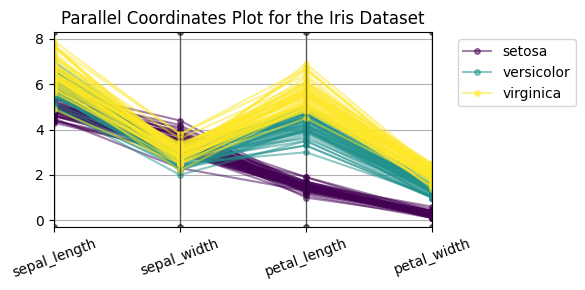

In [8]:
# Set the color map to match the species colors with 'viridis' or similar
colormap = plt.cm.viridis

# Create the parallel coordinates plot
plt.figure(figsize=(6, 3))
parallel_coordinates(iris, class_column='species', color=[colormap(i) for i in np.linspace(0, 1, len(iris['species'].unique()))], alpha=0.3)

# Customize the plot to show markers and a bit more transparency
for line in plt.gca().get_lines():
    line.set_marker('o')
    line.set_markersize(4)
    line.set_alpha(0.5)  # Adjust transparency

# Enhance plot readability
plt.title('Parallel Coordinates Plot for the Iris Dataset')
plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- We can also use boxplots to visualize the values of our numerical variables

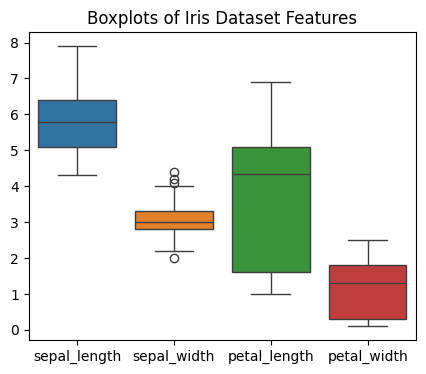

In [9]:
# Create a new DataFrame without the species column
iris_numeric = iris.select_dtypes(include=[float, int])

# Create the boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(data=iris_numeric)

plt.title('Boxplots of Iris Dataset Features')
plt.show()

- The problem is that when using boxplots, to detect outliers is that we study one variable at a time.

- We can also create scatter plots of specific features of our dataset.

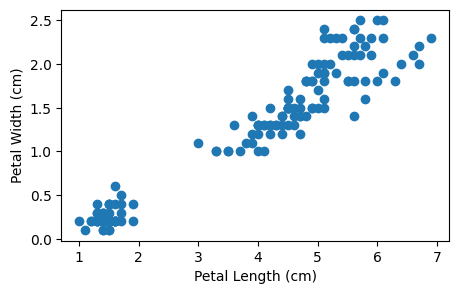

In [10]:
# Create a scatter plot with Matplotlib
plt.figure(figsize=(5, 3))
plt.scatter(iris['petal_length'], iris['petal_width'])

# plt.title()
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

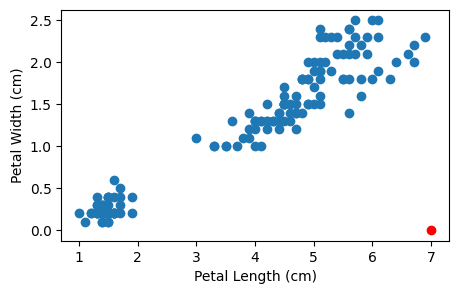

In [11]:
# Assuming iris_df is your DataFrame and it has columns 'petal length (cm)' and 'petal width (cm)'

# Create a scatter plot with the original data
plt.figure(figsize=(5,3))
plt.scatter(iris['petal_length'], iris['petal_width'], label='Iris Data')

# Add an additional data point close to (7, 0)
plt.scatter([7], [0], color='red', label='Outlier')

# Add titles and labels
# plt.title('Scatter Plot of Petal Length vs Petal Width with Additional Data Point')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Add a legend to the plot to identify the newly added point
# plt.legend()

# Show the plot
plt.show()

### Mahalanobis distance

c:\Users\kostas\prj\xarokopeio_master_teaching\spring_2024\venv\lib\site-packages\matplotlib\patches.py:1566: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
c:\Users\kostas\prj\xarokopeio_master_teaching\spring_2024\venv\lib\site-packages\matplotlib\patches.py:1567: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))


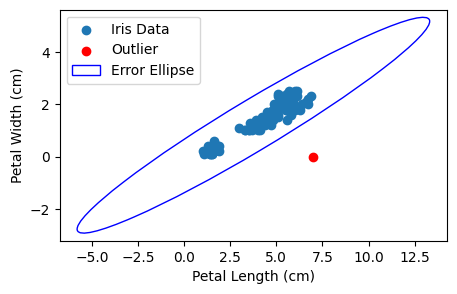

In [12]:
# Filter the data to include only the petal length and width
iris_petal_data = iris[['petal_length', 'petal_width']]

# Function to draw an ellipse from the covariance matrix


plt.figure(figsize=(5,3))

# Original scatter plot
plt.scatter(iris_petal_data['petal_length'], iris_petal_data['petal_width'], label='Iris Data')
# Additional data point
plt.scatter([7], [0], color='red', label='Outlier')

# Calculate mean and covariance matrix of the petal data
mean_vec = np.mean(iris_petal_data, axis=0)
cov_mat = np.cov(iris_petal_data.T, bias=True)

# Add the error ellipse
ax = plt.gca()
draw_mahalanobis_ellipse(mean_vec, cov_mat, ax, n_std=2, confidence_level=0.95, edgecolor='blue', facecolor='none', label='Error Ellipse')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

- To find outliers in such plots we can use the Mahalanobis distance.

- It creates an error ellipse; any data point outside this ellipse can be considered as an outlier.

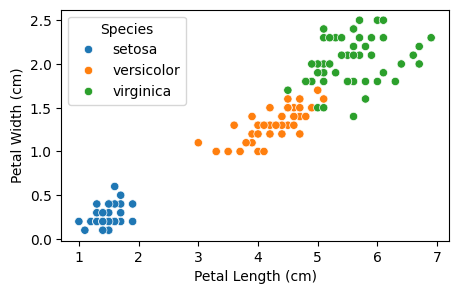

In [13]:
# Assuming iris_df is your DataFrame and includes a 'species' column along with 'petal length (cm)' and 'petal width (cm)'

# Create a scatter plot with Seaborn where points are colored by species
plt.figure(figsize=(5,3))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

# Add labels
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Add a legend to the plot
plt.legend(title='Species')

# Show the plot
plt.show()

<Figure size 500x300 with 0 Axes>

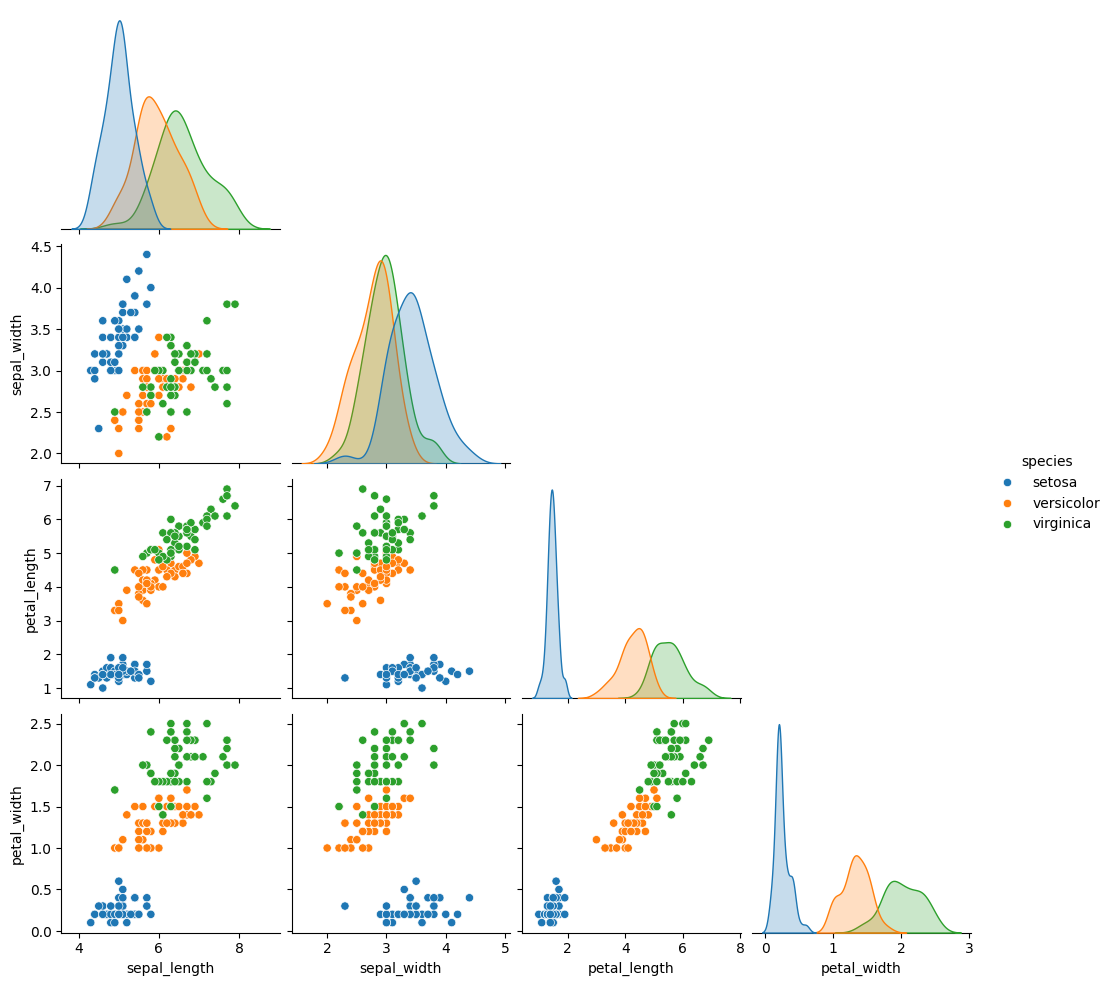

In [14]:
plt.figure(figsize=(5,3))
g = sns.pairplot(iris, hue="species", corner=True)
# g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

- We can also combine the variables that we have in the dataset into fewer using PCA.

In [15]:
# Separate the features and the species
X = iris.drop('species', axis=1)
y = iris['species']

# Initialize PCA and reduce the data to two components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results and the species for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

In [16]:
pca_df

,PC1,PC2,Species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


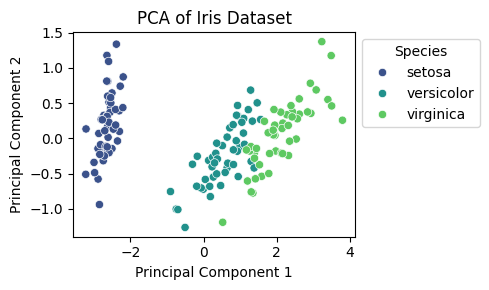

In [17]:
# Plot the PCA-transformed version of the Iris dataset
plt.figure(figsize=(5, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='viridis')

# Add axis labels and title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')

# Move the legend outside of the plot
plt.legend(title='Species', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust plot to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

- We can also group flowers that have a reatively similar size using hierarchical clustering

In [18]:
X_scaled = iris_scaled.drop('species', axis=1)

# Step 2: Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters2 = clustering.fit_predict(X_scaled)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
pca_df['Cluster2'] = clusters2

In [ ]:
# Step 4: Plot the PCA-transformed data, colored by hierarchical clustering results
plt.figure(figsize=(5, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster2', data=pca_df, palette='viridis', style=iris['species'], markers=True)

# Add axis labels and title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset Colored by Hierarchical Clustering Results')

# Move the legend outside of the plot
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [ ]:
# Step 2: Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clusters3 = clustering.fit_predict(X_scaled)

In [ ]:
pca_df['Cluster3'] = clusters3

In [ ]:
# Step 4: Plot the PCA-transformed data, colored by hierarchical clustering results
plt.figure(figsize=(5, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster3', data=pca_df, palette='viridis', style=iris['species'], markers=True)

# Add axis labels and title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset Colored by Hierarchical Clustering Results')

# Move the legend outside of the plot
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [ ]:
y = iris_scaled['species']
X = iris_scaled.drop('species', axis=1)

le = LabelEncoder()

y = le.fit_transform(y)

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC(kernel='rbf')  # Radial Basis Function (RBF) kernel

![svm_nonlinear1.png](./images/svm_nonlinear1.png)

![svm_nonlinear2.png](./images/svm_nonlinear2.png)

In [ ]:
classifiers = [knn, dtree, rf, svm]
classifier_names = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine']

for clf, name in zip(classifiers, classifier_names):
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the results
    print(f"{name}: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}")

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=iris_scaled.columns[:-1], class_names=le.classes_, rounded=True, proportion=False, precision=2)
plt.show()